In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! pwd

/content


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          15260        430  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            443         32  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1665         56  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [ ]:
! kaggle datasets download -d cjinny/mura-v11 -p /content/mura-v11

100% 3.14G/3.14G [02:20<00:00, 24.9MB/s]
100% 3.14G/3.14G [02:20<00:00, 24.0MB/s]


In [ ]:
! unzip /content/mura-v11/mura-v11.zip -d /content

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08489/study1_negative/image3.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08489/study1_negative/image4.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image1.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image2.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image3.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08491/study1_negative/image1.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08491/study1_negative/image2.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08492/study1_negative/image1.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08492/study1_negative/image2.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08493/study1_negative/image1.png  
  inflating: /content/MURA-v1.1/train/XR_WRIST/patient08493/stu

In [ ]:
import os
import shutil

# Helper Functions

For the given original directory, get a list of dictionaries containing body part name, patient id, image path

In [ ]:
def load_path(path):
    dataset = [] 

    for body in os.listdir(path):
        body_part = body
        path_p = os.path.join(path,str(body))

        for id_p in os.listdir(path_p):
            patient_id = id_p
            path_id =os.path.join(path_p,str(id_p))

            for lab in os.listdir(path_id):
                path_l =os.path.join( path_id,str(lab))

                for img in os.listdir(path_l):
                    img_path =os.path.join(path_l,str(img))
                    dataset.append(
                        {
                            'body_part': body_part,
                            'patient_id': patient_id,
                            'img_path': img_path
                        }
                    )
    return dataset

copying a file in the original directory  to target directory by naming it   

In [ ]:
def copy_to_folder(file_info_dict,target_parent_dir):
    source=file_info_dict['img_path']
    dest=os.path.join(target_parent_dir,file_info_dict['body_part'])
    post_fix=file_info_dict['img_path'].split('/')[-2:]
    post_fix='_'.join(post_fix)
    dest=os.path.join(dest,file_info_dict['patient_id']+post_fix)
    try:
        if os.path.isfile(dest):
            print(f'{dest} is already there' )
        shutil.copy(source, dest)

    except shutil.SameFileError:
        print("Source and destination represents the same file.")
 
    except PermissionError:
        print("Permission denied.")
 
    except:
        print("Error occurred while copying file.")

# Construct target  directory with subdirectories

In [ ]:
original_dir_path='MURA-v1.1'
original_train_dir_path=os.path.join(original_dir_path,'train')
original_valid_dir_path=os.path.join(original_dir_path,'valid')

In [ ]:
parent_dir='MURA-v1.1_new'
os.mkdir(parent_dir)

In [ ]:
train_path=os.path.join(parent_dir,'train')
valid_path=os.path.join(parent_dir,'valid')

In [ ]:
os.mkdir(train_path)
os.mkdir(valid_path)

In [ ]:
for body_part in os.listdir(original_train_dir_path):
    body_part_path=os.path.join(train_path,body_part)
    os.mkdir(body_part_path)

In [ ]:
for body_part in os.listdir(original_valid_dir_path):
    body_part_path=os.path.join(valid_path,body_part)
    os.mkdir(body_part_path)


# Get lists of file info in all subfolders of train and test

In [ ]:
train_dataset_info_list = load_path(original_train_dir_path)

In [ ]:
valid_dataset_info_list = load_path(original_valid_dir_path)

# Copy files to the body parts directories in train and test

In [ ]:
for file_info in train_dataset_info_list:
    copy_to_folder(file_info,train_path)

In [ ]:
for file_info in valid_dataset_info_list:
    copy_to_folder(file_info,valid_path)

In [ ]:
!echo '' > /content/MURA-v1.1_new/train/XR_WRIST/patient07840study1_negative_._image1.png && rm /content/MURA-v1.1_new/train/XR_WRIST/patient07840study1_negative_._image1.png
!echo '' > /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image1.png && rm /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image1.png
!echo '' > /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image2.png && rm /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image2.png
!echo '' > /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image3.png && rm /content/MURA-v1.1_new/train/XR_WRIST/patient07840study2_negative_._image3.png

# Check the number of files 

In [ ]:
def print_number_of_total_files(path):
    img_names = []

    for folder, subfolders, filenames in os.walk(path):
        for img in filenames:
            img_names.append(folder+'\\'+img)
        
    print(f'Number of files in {path}  = {len(img_names)}:')

In [ ]:
directories_to_check=[original_train_dir_path,train_path,original_valid_dir_path,valid_path]

for directory in directories_to_check:
    print("---------------------")
    print_number_of_total_files(directory)

---------------------
Number of files in MURA-v1.1/train  = 36812:
---------------------
Number of files in MURA-v1.1_new/train  = 36808:
---------------------
Number of files in MURA-v1.1/valid  = 3197:
---------------------
Number of files in MURA-v1.1_new/valid  = 3197:


In [ ]:
import shutil
shutil.rmtree('/content/mura-v11', ignore_errors=True)
shutil.rmtree('/content/MURA-v1.1', ignore_errors=True)

In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-uf6aftgn
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet /tmp/pip-req-build-uf6aftgn
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.1 MB/s eta 0:00:00
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=2771d2a93e8f63b73749143ef63114924c31e2ce8d60f87cbae1e2ec31a0214b
  Stored in directory: /tmp/pip-ephem-wheel-cache-88ta8f9d/wheels/4f/5d/1a/f5568d40de3899e676981cbe16009738bab99940f320f402b5
Successfully built efficientnet


In [ ]:
!pip install -U git+https://github.com/qubvel/classification_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models to /tmp/pip-req-build-o99jfn0j
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models /tmp/pip-req-build-o99jfn0j
  Resolved https://github.com/qubvel/classification_models to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=2f28eae03195336f3342215c86c20f2baab67bc5c1efcb787390d2fc63aa2507
  Stored in directory: /tmp/pip-ephem-wheel-cache-j56hznff/wheels/77/00/d7/a111c45a5eb8c497815680b5e64c9b9192b1516d9c22281ee1
Successfully built image-classifiers


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.8 MB/s eta 0:00:00


In [ ]:
!nvidia-smi # GPU Configuration

Tue Jan  3 19:10:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Classification**

In [ ]:
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]
TRAIN_PATH = '/content/MURA-v1.1_new/train'
TEST_PATH = '/content/MURA-v1.1_new/valid'
VALID_PATH = '/content/MURA-v1.1_new/valid'

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall + K.epsilon()))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plot_datagen = ImageDataGenerator(dtype='float32', 
                                  rescale=1.0/224.0)

plot_generator = plot_datagen.flow_from_directory(TRAIN_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=16,
                                                   class_mode='categorical')

Found 36808 images belonging to 7 classes.


(16, 224, 224, 3)


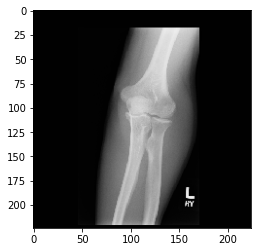

(16, 224, 224, 3)


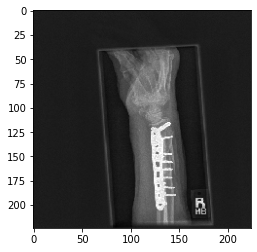

(16, 224, 224, 3)


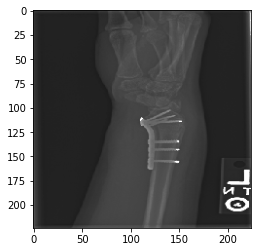

(16, 224, 224, 3)


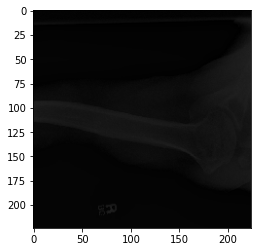

(16, 224, 224, 3)


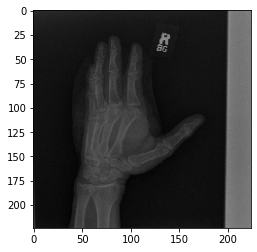

In [ ]:
for _ in range(5):
    img, label = plot_generator.next()
    print(img.shape) # (16,224,224,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

def standardize(image_data):
    image_data -= np.array(mean)
    image_data /= np.array(std)
    return image_data

train_datagen = ImageDataGenerator(dtype='float32',
                                   rescale=1.0/255.0,
                                   preprocessing_function=standardize,
                                  #  shear_range=0.1,
                                  #  zoom_range=0.1,
                                  #  rotation_range=10, # rotation
                                  #  vertical_flip=True,
                                  #  horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    shuffle=True,
                                                    target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                    batch_size=64,
                                                    class_mode='categorical')

val_datagen = ImageDataGenerator(dtype='float32', 
                                 rescale=1.0/255.0,
                                 preprocessing_function=standardize
                                 )

val_generator = val_datagen.flow_from_directory(VALID_PATH,
                                                shuffle=True,
                                                target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                batch_size=16,
                                                class_mode='categorical')

test_generator = val_datagen.flow_from_directory(TEST_PATH,
                                                 shuffle=False,
                                                 target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 36808 images belonging to 7 classes.
Found 3197 images belonging to 7 classes.
Found 3197 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
import efficientnet.tfkeras as efn 

# base_model = EfficientNetB0(include_top=False, weights='noisy-student')
base_model = efn.EfficientNetB0(include_top = False, weights = 'noisy-student', input_shape = (*IMAGE_SIZE, 3))
base_model.trainable = False
# add a global spatial average pooling layer
x = base_model.output
#base_model.summary()

x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

################ FINE-TUNE ##################
# WARNING: when base_model if 0; when fine-tune if 1
if 1:
  # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
  for layer in base_model.layers[-20:]:
      if not isinstance(layer, layers.BatchNormalization):
          layer.trainable = True
#############################################

predictions = layers.Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# WARNING: when base_model lr=1e-2; when fine-tune lr=1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',  optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.AUC(), f1_score, precision_m, recall_m ])
model.summary()

16696600/16696600 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                             

In [ ]:
%%time

model_name_save= '/content/DL_Project_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=False)
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=50, min_learning_rate=5e-5, verbose=1,  mode='max')

# WARNING: when base_model epochs=25; when fine-tune epochs=10
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=[checkpoint, early_stop, plateau], shuffle=True, verbose = 1)

Epoch 1/25
576/576 [==============================] - ETA: 0s - loss: 0.5154 - accuracy: 0.8934 - auc: 0.9776 - f1_score: 0.8938 - precision_m: 0.8982 - recall_m: 0.8898
Epoch 1: val_accuracy improved from -inf to 0.90522, saving model to /content/DL_Project_model.hdf5
576/576 [==============================] - 279s 454ms/step - loss: 0.5154 - accuracy: 0.8934 - auc: 0.9776 - f1_score: 0.8938 - precision_m: 0.8982 - recall_m: 0.8898 - val_loss: 0.4621 - val_accuracy: 0.9052 - val_auc: 0.9794 - val_f1_score: 0.9055 - val_precision_m: 0.9101 - val_recall_m: 0.9013 - lr: 0.0100
Epoch 2/25
576/576 [==============================] - ETA: 0s - loss: 0.3568 - accuracy: 0.9175 - auc: 0.9852 - f1_score: 0.9183 - precision_m: 0.9219 - recall_m: 0.9148
Epoch 2: val_accuracy improved from 0.90522 to 0.91992, saving model to /content/DL_Project_model.hdf5
576/576 [==============================] - 246s 427ms/step - loss: 0.3568 - accuracy: 0.9175 - auc: 0.9852 - f1_score: 0.9183 - precision_m: 0.92

In [ ]:
scores = model.evaluate(test_generator)

200/200 [==============================] - 21s 104ms/step - loss: 0.3266 - accuracy: 0.9112 - auc: 0.9863 - f1_score: 0.9130 - precision_m: 0.9208 - recall_m: 0.9059


In [ ]:
print("loss      = ", scores[0])
print("accuracy  = ", scores[1])
print("auc       = ", scores[2])
print("f1_score  = ", scores[3])
print("precision = ", scores[4])
print("recall_m  = ", scores[5])

loss      =  0.32661139965057373
accuracy  =  0.9111667275428772
auc       =  0.986341118812561
f1_score  =  0.912956714630127
precision =  0.920788049697876
recall_m  =  0.9058654308319092


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

Y_pred = model.predict(test_generator, 3197 // 7)
y_pred = np.argmax(Y_pred, axis=1)

200/200 [==============================] - 21s 102ms/step


In [ ]:
print('Classification Report')
target_names = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    XR_ELBOW       0.89      0.90      0.89       465
   XR_FINGER       0.91      0.92      0.91       461
  XR_FOREARM       0.82      0.81      0.82       301
     XR_HAND       0.94      0.95      0.94       460
  XR_HUMERUS       0.96      0.77      0.85       288
 XR_SHOULDER       0.97      0.95      0.96       563
    XR_WRIST       0.89      0.96      0.93       659

    accuracy                           0.91      3197
   macro avg       0.91      0.89      0.90      3197
weighted avg       0.91      0.91      0.91      3197



In [ ]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.9/201.9 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 

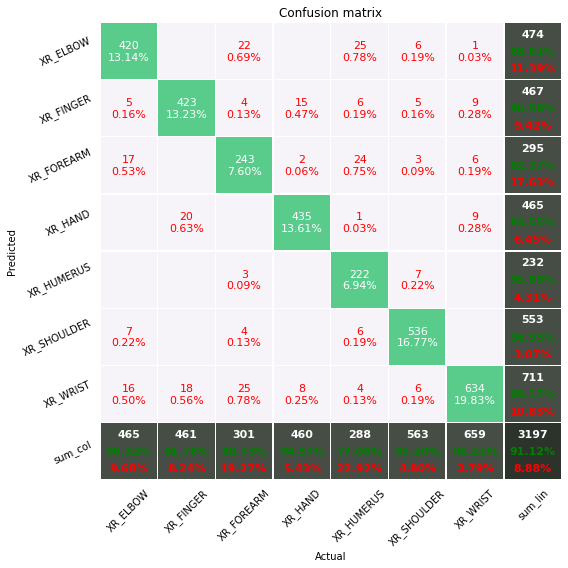

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from pretty_confusion_matrix import pp_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

target_names = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']
array = confusion_matrix(test_generator.classes, y_pred)

df_cm = pd.DataFrame(array, index = [i for i in target_names],
                     columns = [i for i in target_names])

cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)

In [ ]:
from sklearn.metrics import f1_score

micro_f1_score = f1_score(test_generator.classes, y_pred, average='micro')
macro_f1_score = f1_score(test_generator.classes, y_pred, average='macro')

print("accuracy        = ", scores[1])
print("f1_score        = ", scores[3])
print("Micro f1_score  = ", micro_f1_score)
print("Macro f1_score  = ", macro_f1_score)

accuracy        =  0.9111667275428772
f1_score        =  0.912956714630127
Micro f1_score  =  0.9111667187988739
Macro f1_score  =  0.9003072112979635


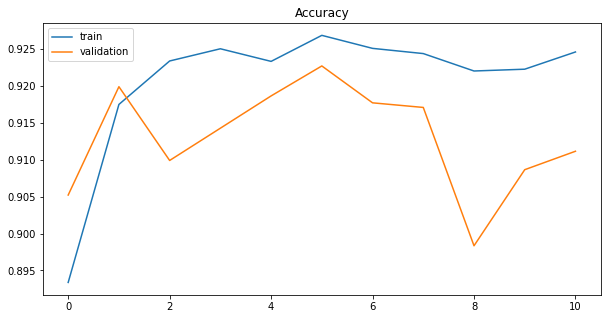

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

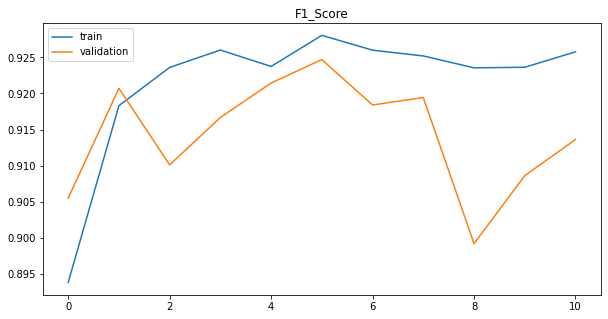

In [ ]:
plt.figure(figsize=(10,5))
plt.title('F1_Score')
plt.plot(history.history['f1_score'], label='train')
plt.plot(history.history['val_f1_score'], label='validation')
plt.legend()
plt.show()